In [ ]:
!pip install -q tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 32 kB/s 
     |████████████████████████████████| 3.8 MB 36.8 MB/s 
     |████████████████████████████████| 449 kB 46.9 MB/s 
     |████████████████████████████████| 50 kB 2.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.0.2 which is incompatible.
tensorflow 2.8.2+zzzcolab20220719082949 requires tensorflow-estimator<2.9,>=2.8, but you have tensorflow-estimator 2.0.1 which is incompatible.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.


In [20]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d1c342397f6816889a593b30a89bbf9f4485e67664a6d206458c2033d10dd3cd
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [21]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
%load_ext tensorboard

In [ ]:
logdir = "log"

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


train_images = train_images.reshape([60000,28,28,1])
test_images = test_images.reshape([10000,28,28,1])
train_images, test_images = train_images/255.0, test_images/ 225.0

classes = [0,1,2,3,4,5,6,7,8,9]

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape= (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = "relu"))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))

In [ ]:
tensorboard_call = tf.keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

In [ ]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(x=train_images, y=train_labels, epochs= 5, validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.1406 - accuracy: 0.9564 - val_loss: 0.0411 - val_accuracy: 0.9870
Epoch 2/5
60000/60000 [==============================] - 93s 2ms/sample - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.0357 - val_accuracy: 0.9897
Epoch 3/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0275 - val_accuracy: 0.9914
Epoch 4/5
60000/60000 [==============================] - 69s 1ms/sample - loss: 0.0243 - accuracy: 0.9923 - val_loss: 0.0317 - val_accuracy: 0.9910
Epoch 5/5
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0353 - val_accuracy: 0.9891


In [ ]:
y_true = test_labels
y_pred = model.predict_classes(test_images)

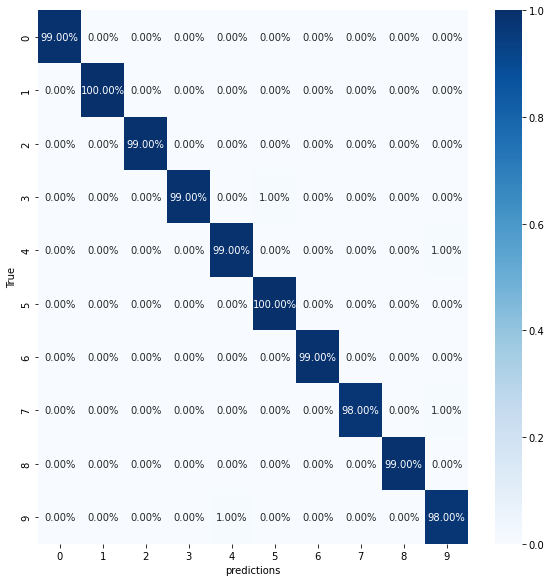

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions = y_pred).numpy()
con_mat_norm = np.around(con_mat.astype("float") / con_mat.sum(axis=1)[:,np.newaxis], decimals = 2)
con_mat_df = pd.DataFrame(con_mat_norm, index= classes, columns = classes)

figure = plt.figure(figsize = (8,8))
sns.heatmap(con_mat_df, annot = True, fmt = ".2%", cmap = plt.cm.Blues)
plt.tight_layout()
plt.ylabel("True")
plt.xlabel("predictions")
con_mat_df
plt.show()

In [ ]:
TP = 0
TN = 0
FN = 0
FP = 0
for i in range (0,len(classes)):
  if(i%2 == 0):
    TP = TP + con_mat[i,i]
  if(i%2 != 0):
    TN = TN + con_mat[i,i]
  for j in range (0,len(classes)): 
    if(i>j): 
      FP = FP+ con_mat[i, j]
    if(i<j):
      FN = FN + con_mat[i, j] 
mconf=[[TP, FP], [FN, TN]] 
mconf

[[4879, 56], [53, 5012]]

<function matplotlib.pyplot.show(*args, **kw)>

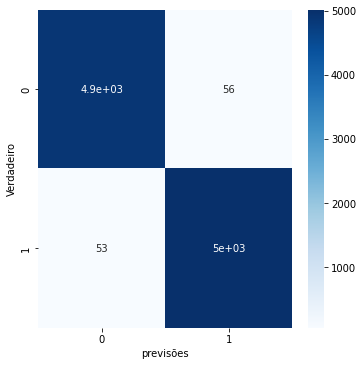

In [ ]:
mconf_df = pd.DataFrame(mconf, index= [0,1], columns = [0,1])

figure = plt.figure(figsize = (5,5))
sns.heatmap(mconf_df, annot = True, cmap = plt.cm.Blues)
plt.tight_layout()
plt.ylabel("Verdadeiro")
plt.xlabel("previsões") 
plt.show

Acuracia (Em porcentagem)

In [ ]:
acuracy = ((TP + TN) / (TP+TN+FN+FP))*100
print(str(acuracy) + "%")

98.91%


Especificação (Em porcentagem)

In [26]:
esp = TN/(FP+TN) * 100
print(str(esp) + "%")

98.89502762430939%


Precisão (Em porcentagem)

In [22]:
precisao = (TP)/(TP+FP) * 100
print(str(precisao) + "%")

98.86524822695036%


Sensibilidade (Em porcentagem)

In [24]:
sensibilidade = TP/(TP+FN)*100
print(str(sensibilidade) + "%")

98.92538523925384%


F-score (Em porcentagem)

In [25]:
fscore = 2*(precisao*sensibilidade)/(precisao+sensibilidade)
print(str(fscore) + "%")

98.89530759095976%
